In [14]:
import dill
import os

ex_name = 'ex3-1D_cubic'

file_path = os.path.join("true_functions", f"{ex_name}.pkl")

with open(file_path, "rb") as f:
    loaded_functions = dill.load(f)

true_drift = loaded_functions["drift"]
true_diffusion = loaded_functions["diffusion"]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import ipynbname
script_dir = os.getcwd()
filename = ipynbname.name()

from sde.SDE_ARFF_lib import (
    SDEARFFTrain,
    NNHyperparameters
)

from sde.experiment_reports_owen import (
    PlotResults,
    sample_data
)

%load_ext autoreload
%autoreload 2

2025-06-04 09:25:55.349549: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 09:25:55.354036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-04 09:25:55.354049: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [90]:
n_dimensions = 1
xlim = np.array([[-2, 2]])

random_seed = 1
rng = np.random.default_rng(random_seed)

n_trajectories = 100
trajectory_time = 1
step_size = 0.00001
grid_resolution = int(trajectory_time/step_size)

x = np.zeros((n_trajectories, n_dimensions, grid_resolution))

x[:, :, 0] = rng.uniform(low=xlim[:,0], high=xlim[:,1], size=(n_trajectories, n_dimensions))

dW = rng.normal(loc=0, scale=np.sqrt(step_size), size=(n_trajectories, n_dimension, grid_resolution - 1))

for i in range(grid_resolution - 1):
    x[:, :, i+1] = x[:, :, i] + true_drift(x[:, :, i]) * step_size + true_diffusion(x[:, :, i]) * dW[:, :, i]


print(x.shape)






(100, 1, 99999)


(999980, 1)
(999980, 1)


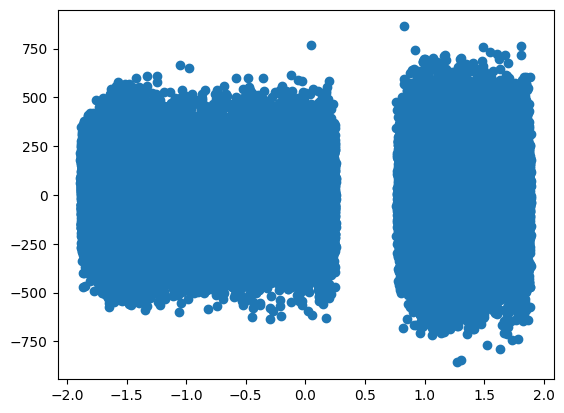

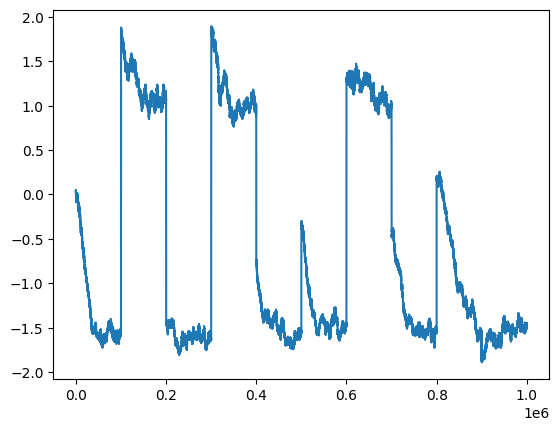

In [89]:
sampled_x = x[::int(1)]
# x_data = x[:, :, :-1].reshape(-1, n_dimensions)
# y_data = x[:, :, 1:].reshape(-1, n_dimensions)
x_data = sampled_x[:, :, :-1].reshape(-1, n_dimensions)
y_data = sampled_x[:, :, 1:].reshape(-1, n_dimensions)
print(x_data.shape)
print(y_data.shape)

plt.scatter(x_data, (y_data-x_data)/step_size)
plt.show()
plt.plot(x_data)
plt.show()

In [92]:

np.savez(f"training_data/{ex_name}_time{trajectory_time}_SS{step_size}_ntraj{n_trajectories}.npz", n_dimensions=n_dimensions, step_size=step_size, xlim=xlim, trajectories=x, y_data=y_data)
